## Naive bayes, LDA and QDA in Python and practical considerations

This week we have introduce new techniques called Naive bayes, LDA and QDA. In this code demostration, we will highlight a couple of things when you apply those methods to real life models, including:

- Fit and compare different models
- Make a plot for the decision boundary
- Include KDE to the Naive Balance 


Note: These are general characteristics and differences between the algorithms. The specific performance and behavior of each algorithm can vary depending on the dataset and the specific implementation.

#### Example 1: Credit Card Balance data

A simulated credit card balance data with 400 entries. The target value is whether their credit card utilization is over 10%. For the first example, we will only use income and limit for the prediction. 

In [1]:
import pandas as pd

# Load the CSV data file
data = pd.read_csv('Credit.csv')
print(data.head())

   ID   Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   1   14.891   3606     283      2   34         11    Male      No     Yes   
1   2  106.025   6645     483      3   82         15  Female     Yes     Yes   
2   3  104.593   7075     514      4   71         11    Male      No      No   
3   4  148.924   9504     681      3   36         11  Female      No      No   
4   5   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  Utilization10  
0  Caucasian      333          False  
1      Asian      903           True  
2      Asian      580          False  
3      Asian      964           True  
4  Caucasian      331          False  


#### Fit NB, LDA and QDA

In [2]:
from sklearn.model_selection import train_test_split

X = data[['Income', 'Limit']]
y = data.iloc[:,-1]
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 5220)

      Income  Limit
0     14.891   3606
1    106.025   6645
2    104.593   7075
3    148.924   9504
4     55.882   4897
..       ...    ...
395   12.096   4100
396   13.364   3838
397   57.872   4171
398   37.728   2525
399   18.701   5524

[400 rows x 2 columns]
0      False
1       True
2      False
3       True
4      False
       ...  
395     True
396     True
397    False
398    False
399     True
Name: Utilization10, Length: 400, dtype: bool


In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [4]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

nb_accuracy = nb_model.score(X_test, y_test)
lda_accuracy = lda_model.score(X_test, y_test)
qda_accuracy = qda_model.score(X_test, y_test)

print("Naive Bayes accuracy: ", nb_accuracy)
print("LDA accuracy: ", lda_accuracy)
print("QDA accuract: ", qda_accuracy)

Naive Bayes accuracy:  0.7625
LDA accuracy:  0.8875
QDA accuract:  0.8875


#### Plot the decison boundary

In [5]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Create a meshgrid of points
x_min, x_max = X['Income'].min()-0.5, X['Income'].max()+0.5
y_min, y_max = X['Limit'].min()-0.5, X['Limit'].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 10))

nb_pred = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
lda_pred = lda_model.predict(np.c_[xx.ravel(), yy.ravel()])
qda_pred = qda_model.predict(np.c_[xx.ravel(), yy.ravel()])

nb_pred = nb_pred.reshape(xx.shape)
lda_pred = lda_pred.reshape(xx.shape)
qda_pred = qda_pred.reshape(xx.shape)

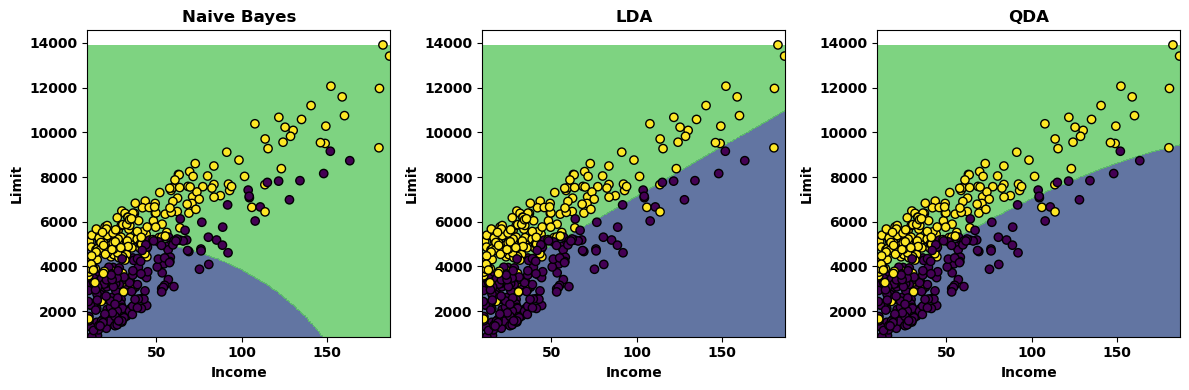

In [6]:
# Plot the decision boundaries
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))

plt.subplot(1,3,1)
plt.contourf(xx, yy, nb_pred, alpha = 0.8)
plt.scatter(X['Income'], X['Limit'], c = y, edgecolor = "k")
plt.xlabel("Income")
plt.ylabel('Limit')
plt.title('Naive Bayes')

plt.subplot(1,3,2)
plt.contourf(xx, yy, lda_pred, alpha = 0.8)
plt.scatter(X['Income'], X['Limit'], c = y, edgecolor = "k")
plt.xlabel("Income")
plt.ylabel('Limit')
plt.title('LDA')

plt.subplot(1,3,3)
plt.contourf(xx, yy, qda_pred, alpha = 0.8)
plt.scatter(X['Income'], X['Limit'], c = y, edgecolor = "k")
plt.xlabel("Income")
plt.ylabel('Limit')
plt.title('QDA')

plt.tight_layout()
plt.show()

Now try to use all variables except ID and Balance (Since the target values is created with Balance/Limit > 0.1). Report the accuracy for three different method and make a data visualization with Income and Limit. Compare with the previous plots. 

In [42]:
data = pd.read_csv('Credit.csv')
data = pd.get_dummies(data, columns = ['Gender', 'Student', 'Married', 'Ethnicity'])

print(data.head())

X = data.drop(columns = ['ID', 'Balance', 'Utilization10'])
# X = X.rename(columns={'Gender_ Male': 'Gender_Male'})
y = data['Utilization10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 5220)

   ID   Income  Limit  Rating  Cards  Age  Education  Balance  Utilization10  \
0   1   14.891   3606     283      2   34         11      333          False   
1   2  106.025   6645     483      3   82         15      903           True   
2   3  104.593   7075     514      4   71         11      580          False   
3   4  148.924   9504     681      3   36         11      964           True   
4   5   55.882   4897     357      2   68         16      331          False   

   Gender_ Male  Gender_Female  Student_No  Student_Yes  Married_No  \
0          True          False        True        False       False   
1         False           True       False         True       False   
2          True          False        True        False        True   
3         False           True        True        False        True   
4          True          False        True        False       False   

   Married_Yes  Ethnicity_African American  Ethnicity_Asian  \
0         True               

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

nb_accuracy = nb_model.score(X_test, y_test)
lda_accuracy = lda_model.score(X_test, y_test)
qda_accuracy = qda_model.score(X_test, y_test)

print("Naive Bayes accuracy: ", nb_accuracy)
print("LDA accuracy: ", lda_accuracy)
print("QDA accuract: ", qda_accuracy)

Naive Bayes accuracy:  0.7875
LDA accuracy:  0.975
QDA accuract:  0.5375


In [46]:
x_min, x_max = X["Income"].min() - 0.5, X["Income"].max() + 0.5
y_min, y_max = X["Limit"].min() - 0.5, X["Limit"].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 10))

newdata = pd.DataFrame({'Income': xx.ravel(), 'Limit': yy.ravel()})
newdata['Rating'] = X['Rating'].mean()
newdata['Cards'] = X['Cards'].mean()
newdata['Age'] = X['Age'].mean()
newdata['Education'] = X['Education'].mean()
newdata['Gender_ Male'] = 1
newdata['Gender_Female'] = 0
newdata['Student_Yes'] = 0
newdata['Student_No'] = 1
newdata['Married_Yes'] = 1
newdata['Married_No'] = 0
newdata['Ethnicity_African American'] = 0
newdata['Ethnicity_Asian'] = 0
newdata['Ethnicity_Caucasian'] = 1
print(newdata)

         Income    Limit  Rating   Cards      Age  Education  Gender_ Male  \
0         9.854    854.5  354.94  2.9575  55.6675      13.45             1   
1        10.854    854.5  354.94  2.9575  55.6675      13.45             1   
2        11.854    854.5  354.94  2.9575  55.6675      13.45             1   
3        12.854    854.5  354.94  2.9575  55.6675      13.45             1   
4        13.854    854.5  354.94  2.9575  55.6675      13.45             1   
...         ...      ...     ...     ...      ...        ...           ...   
232463  182.854  13904.5  354.94  2.9575  55.6675      13.45             1   
232464  183.854  13904.5  354.94  2.9575  55.6675      13.45             1   
232465  184.854  13904.5  354.94  2.9575  55.6675      13.45             1   
232466  185.854  13904.5  354.94  2.9575  55.6675      13.45             1   
232467  186.854  13904.5  354.94  2.9575  55.6675      13.45             1   

        Gender_Female  Student_Yes  Student_No  Married_Yes  Ma

In [47]:
nb_pred = nb_model.predict(newdata)
lda_pred = lda_model.predict(newdata)
qda_pred = qda_model.predict(newdata)

nb_pred = nb_pred.reshape(xx.shape)
lda_pred = lda_pred.reshape(xx.shape)
qda_pred = qda_pred.reshape(xx.shape)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


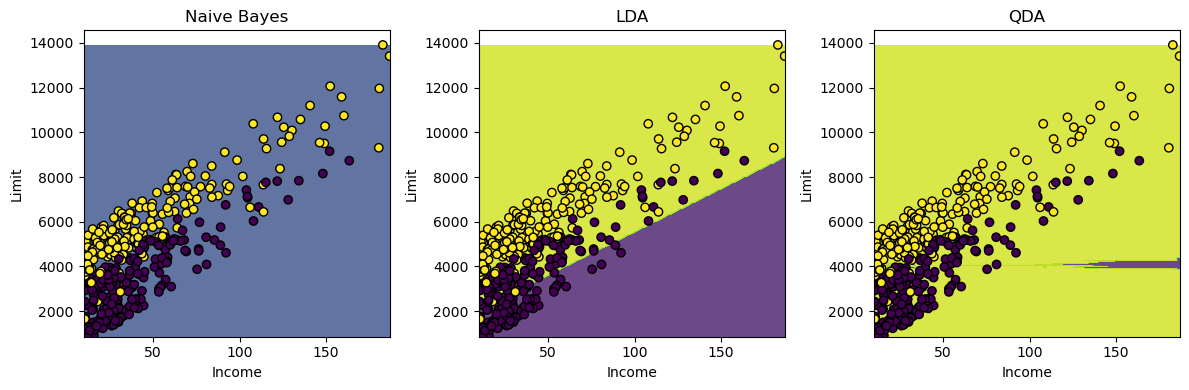

In [28]:
plt.figure(figsize = (12, 4))

plt.subplot(1,3,1)
plt.contourf(xx, yy, nb_pred, alpha = 0.8)
plt.scatter(X['Income'], X['Limit'], c = y, edgecolor = "k")
plt.xlabel("Income")
plt.ylabel('Limit')
plt.title('Naive Bayes')

plt.subplot(1,3,2)
plt.contourf(xx, yy, lda_pred, alpha = 0.8)
plt.scatter(X['Income'], X['Limit'], c = y, edgecolor = "k")
plt.xlabel("Income")
plt.ylabel('Limit')
plt.title('LDA')

plt.subplot(1,3,3)
plt.contourf(xx, yy, qda_pred, alpha = 0.8)
plt.scatter(X['Income'], X['Limit'], c = y, edgecolor = "k")
plt.xlabel("Income")
plt.ylabel('Limit')
plt.title('QDA')

plt.tight_layout()
plt.show()

#### Exercise: Breast Cancer data

Load the Breast cancer data we have used last time. Now this is the time to use this data correctly. This is a classification tast since the target value is a group indiciating whether the cancer is benign or malignant.

1. Pick any two variabels. Fit the NB, LDA and QDA model. Compare the classification accruacy and make the plot of decision boundary.
2. Fit model with all variables. Compare the classification accuracy. Is there a difference between the accuracy for benign group and malignant group. 
3. Based on your result, analysis the data you have. (whether the variables are independent? Does the two groups have the same variance? etc.)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [28]:
from sklearn.model_selection import train_test_split

X = df[['mean radius', 'worst area']]
y = pd.DataFrame(target)
# print(X)
# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 5220)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

nb_accuracy = nb_model.score(X_test, y_test)
lda_accuracy = lda_model.score(X_test, y_test)
qda_accuracy = qda_model.score(X_test, y_test)

print("Naive Bayes accuracy: ", nb_accuracy)
print("LDA accuracy: ", lda_accuracy)
print("QDA accuract: ", qda_accuracy)

Naive Bayes accuracy:  0.8771929824561403
LDA accuracy:  0.8245614035087719
QDA accuract:  0.9210526315789473


In [26]:
# Create a meshgrid of points
x_min, x_max = X['mean radius'].min()-0.5, X['mean radius'].max()+0.5
y_min, y_max = X['worst area'].min()-0.5, X['worst area'].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 10))

nb_pred = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
lda_pred = lda_model.predict(np.c_[xx.ravel(), yy.ravel()])
qda_pred = qda_model.predict(np.c_[xx.ravel(), yy.ravel()])

nb_pred = nb_pred.reshape(xx.shape)
lda_pred = lda_pred.reshape(xx.shape)
qda_pred = qda_pred.reshape(xx.shape)

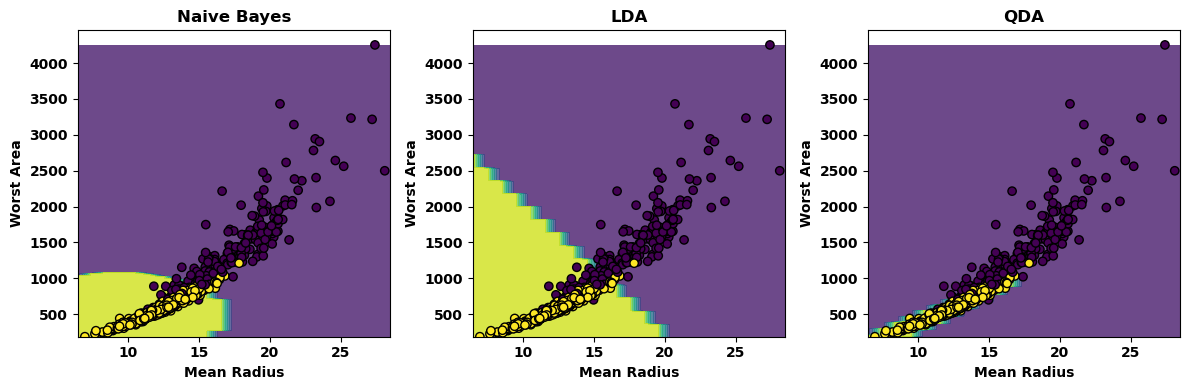

In [27]:
plt.figure(figsize = (12, 4))

plt.subplot(1,3,1)
plt.contourf(xx, yy, nb_pred, alpha = 0.8)
plt.scatter(X['mean radius'], X['worst area'], c = y, edgecolor = "k")
plt.xlabel("Mean Radius")
plt.ylabel('Worst Area')
plt.title('Naive Bayes')

plt.subplot(1,3,2)
plt.contourf(xx, yy, lda_pred, alpha = 0.8)
plt.scatter(X['mean radius'], X['worst area'], c = y, edgecolor = "k")
plt.xlabel("Mean Radius")
plt.ylabel('Worst Area')
plt.title('LDA')

plt.subplot(1,3,3)
plt.contourf(xx, yy, qda_pred, alpha = 0.8)
plt.scatter(X['mean radius'], X['worst area'], c = y, edgecolor = "k")
plt.xlabel("Mean Radius")
plt.ylabel('Worst Area')
plt.title('QDA')

plt.tight_layout()
plt.show()

In [32]:
# Now let's try the models with all variables. Compare the classification accuracy. 
# Is there a difference between the accuracy for benign group and malignant group.

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target

X = df
y = pd.DataFrame(target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 5220)
# X_train

In [33]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

nb_accuracy = nb_model.score(X_test, y_test)
lda_accuracy = lda_model.score(X_test, y_test)
qda_accuracy = qda_model.score(X_test, y_test)

print("Naive Bayes accuracy: ", nb_accuracy)
print("LDA accuracy: ", lda_accuracy)
print("QDA accuract: ", qda_accuracy)

Naive Bayes accuracy:  0.9298245614035088
LDA accuracy:  0.9649122807017544
QDA accuract:  0.956140350877193


We see accuracy from LDA is higher than the one from QDA indicating our decision boundary is linear.
How to check if there is a difference between the accuracy for benign group and malignant group.

#### Include KDE into the NB

In [34]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KernelDensity

class KDENaiveBayesClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth
        self.nb_classifier = GaussianNB()
        self.kdes = {}  # Kernel Density Estimators for each class

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for class_label in self.classes_:
            # Fit a KDE for each class
            X_class = X[y == class_label]
            kde = KernelDensity(bandwidth=self.bandwidth)
            kde.fit(X_class)
            self.kdes[class_label] = kde
        
        # Fit Naive Bayes on the original data
        self.nb_classifier.fit(X, y)
        return self

    def predict(self, X):
        # Compute the class log-likelihoods using KDE
        log_likelihoods = {class_label: kde.score_samples(X) for class_label, kde in self.kdes.items()}
        
        # Predict class labels using Naive Bayes
        nb_predictions = self.nb_classifier.predict(X)
        
        # Combine the predictions by considering both Naive Bayes and KDE
        combined_predictions = []
        for i in range(len(X)):
            class_likelihoods = [log_likelihoods[class_label][i] for class_label in self.classes_]
            combined_likelihoods = np.exp(class_likelihoods) * self.nb_classifier.class_prior_
            combined_predictions.append(self.classes_[np.argmax(combined_likelihoods)])
        
        return np.array(combined_predictions)

    def predict_proba(self, X):
        # Compute the class log-likelihoods using KDE
        log_likelihoods = {class_label: kde.score_samples(X) for class_label, kde in self.kdes.items()}
        
        # Compute class probabilities using Naive Bayes
        nb_probabilities = self.nb_classifier.predict_proba(X)
        
        # Combine the probabilities by considering both Naive Bayes and KDE
        combined_probabilities = []
        for i in range(len(X)):
            class_likelihoods = [log_likelihoods[class_label][i] for class_label in self.classes_]
            combined_likelihoods = np.exp(class_likelihoods) * self.nb_classifier.class_prior_
            combined_probabilities.append(combined_likelihoods / np.sum(combined_likelihoods))
        
        return np.array(combined_probabilities)

In [35]:
# Example usage:
# Replace X_train and y_train with your training data
from sklearn.metrics import accuracy_score

kde_nb = KDENaiveBayesClassifier(bandwidth = 0.5)
kde_nb.fit(X_train, y_train)

kde_nb_predictions = kde_nb.predict(X_test)
accuracy_score(y_test, kde_nb_predictions)


ValueError: Input X contains NaN.
KernelDensity does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### Simulation study

Try to create a simulation study to show how the independence affects the performance of NB and LDA. Think about how to design this question. 

I would first create a 2d array with 2 columns where each column has values arranged linearly from some given range, and then add 2 types of random noises to the columns (one for each column). Doing this will ensure I have 2 columns that are correlated since their values only differ by some noise. I would then create a third label with made-up labels (0 or 1) for each row.
Next, I would create another similar 2d array but this time one column will have values arranged linearly + noise, and the second column will have values arranged logarithmically (or something) else + noise. This ensures the 

In [37]:
import time

np.random.seed(4400)

accuracy_nb, accuracy_lda = [], []
time_nb, time_lda = [], []

correlation = np.arange(0, 1, 0.05)

In [38]:
for cor in correlation:
    X1 = np.random.normal(5, 1, 1000) # mean 5, std. dev. 1, 1000 points
    X2 = cor * X1 + np.random.normal(0, 1, 1000)
    X3 = 2 * cor * X2 + np.random.normal(0, 1, 1000)
    X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})
    y = np.where(X1 > 5, 'group1', 'group2')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=4400)
    # Naive Bayes model
    start_time = time.time()
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    accuracy_nb.append(nb_model.score(X_test, y_test))
    time_nb.append(time.time() - start_time)
    
    # LDA model
    start_time = time.time()
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train, y_train)
    accuracy_lda.append(lda_model.score(X_test, y_test))
    time_lda.append(time.time() - start_time)

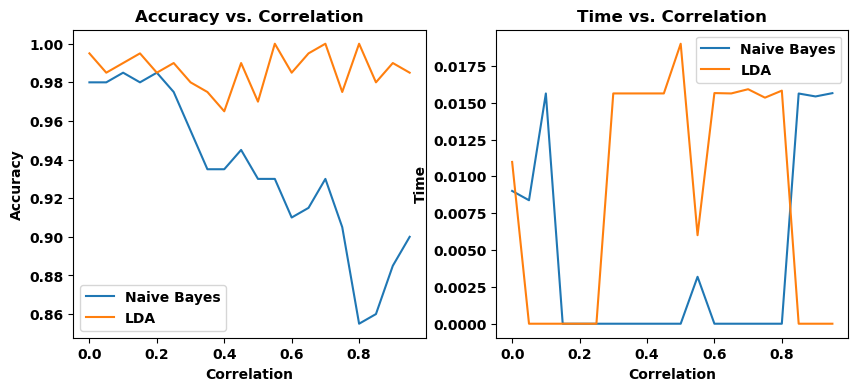

In [41]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(correlation, accuracy_nb, label='Naive Bayes')
plt.plot(correlation, accuracy_lda, label='LDA')
plt.xlabel('Correlation')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Correlation')
plt.legend()

plt.subplot(1,2,2)
plt.plot(correlation, time_nb, label='Naive Bayes')
plt.plot(correlation, time_lda, label='LDA')
plt.xlabel('Correlation')
plt.ylabel('Time')
plt.title('Time vs. Correlation')
plt.legend()